In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import re
import matplotlib.ticker as mtick

sns.set()
sns.set_style("whitegrid")

In [3]:
df_bicg_pg=pd.read_csv(
    "./data/bicg_petsc_ginkgo.csv",
    header=None,
    names=["name_petsc","name_ginkgo","nnzR","nnzR_x","Gflops_petsc", "Glops_ginkgo", "Glops_syncfree","speed_up_ginkgo","speed_up_petsc"])
#print(df_bicg_pg)
max_speed_petsc=np.max(df_bicg_pg["speed_up_petsc"])
max_speed_ginkgo=np.max(df_bicg_pg["speed_up_ginkgo"])
print(max_speed_petsc)
for i in range(0,len(df_bicg_pg)):
    if df_bicg_pg["speed_up_petsc"][i]==max_speed_petsc:
        print(df_bicg_pg["name_petsc"][i])
for i in range(0,len(df_bicg_pg)):
    if df_bicg_pg["speed_up_ginkgo"][i]==max_speed_ginkgo:
        print(df_bicg_pg["name_ginkgo"][i])

16.64251207729469
/home/weifeng/MM/HB/jgl011/jgl011.mtx
/home/weifeng/MM/HB/rgg010/rgg010.mtx


In [4]:
df_cg_pg=pd.read_csv(
    "./data/cg_petsc_ginkgo.csv",
    header=None,
    names=["name_petsc","name_ginkgo","nnzR","nnzR_x","Gflops_petsc", "Glops_ginkgo", "Glops_syncfree","speed_up_ginkgo","speed_up_petsc"])
#print(df_cg_pg)
max_speed_petsc_cg=np.max(df_cg_pg["speed_up_petsc"])
max_speed_ginkgo_cg=np.max(df_cg_pg["speed_up_ginkgo"])
for i in range(0,len(df_cg_pg)):
    if df_cg_pg["speed_up_petsc"][i]==max_speed_petsc_cg:
        print(df_cg_pg["name_petsc"][i])
for i in range(0,len(df_cg_pg)):
    if df_cg_pg["speed_up_ginkgo"][i]==max_speed_ginkgo_cg:
        print(df_cg_pg["name_ginkgo"][i])

/home/weifeng/MM/HB/bcsstm22/bcsstm22.mtx
/home/weifeng/MM/Bai/mhdb416/mhdb416.mtx


5.378435286687339
4.368969668454112
3.572101073803039
16.64251207729469
3.7894873334223877
11.734234234234236


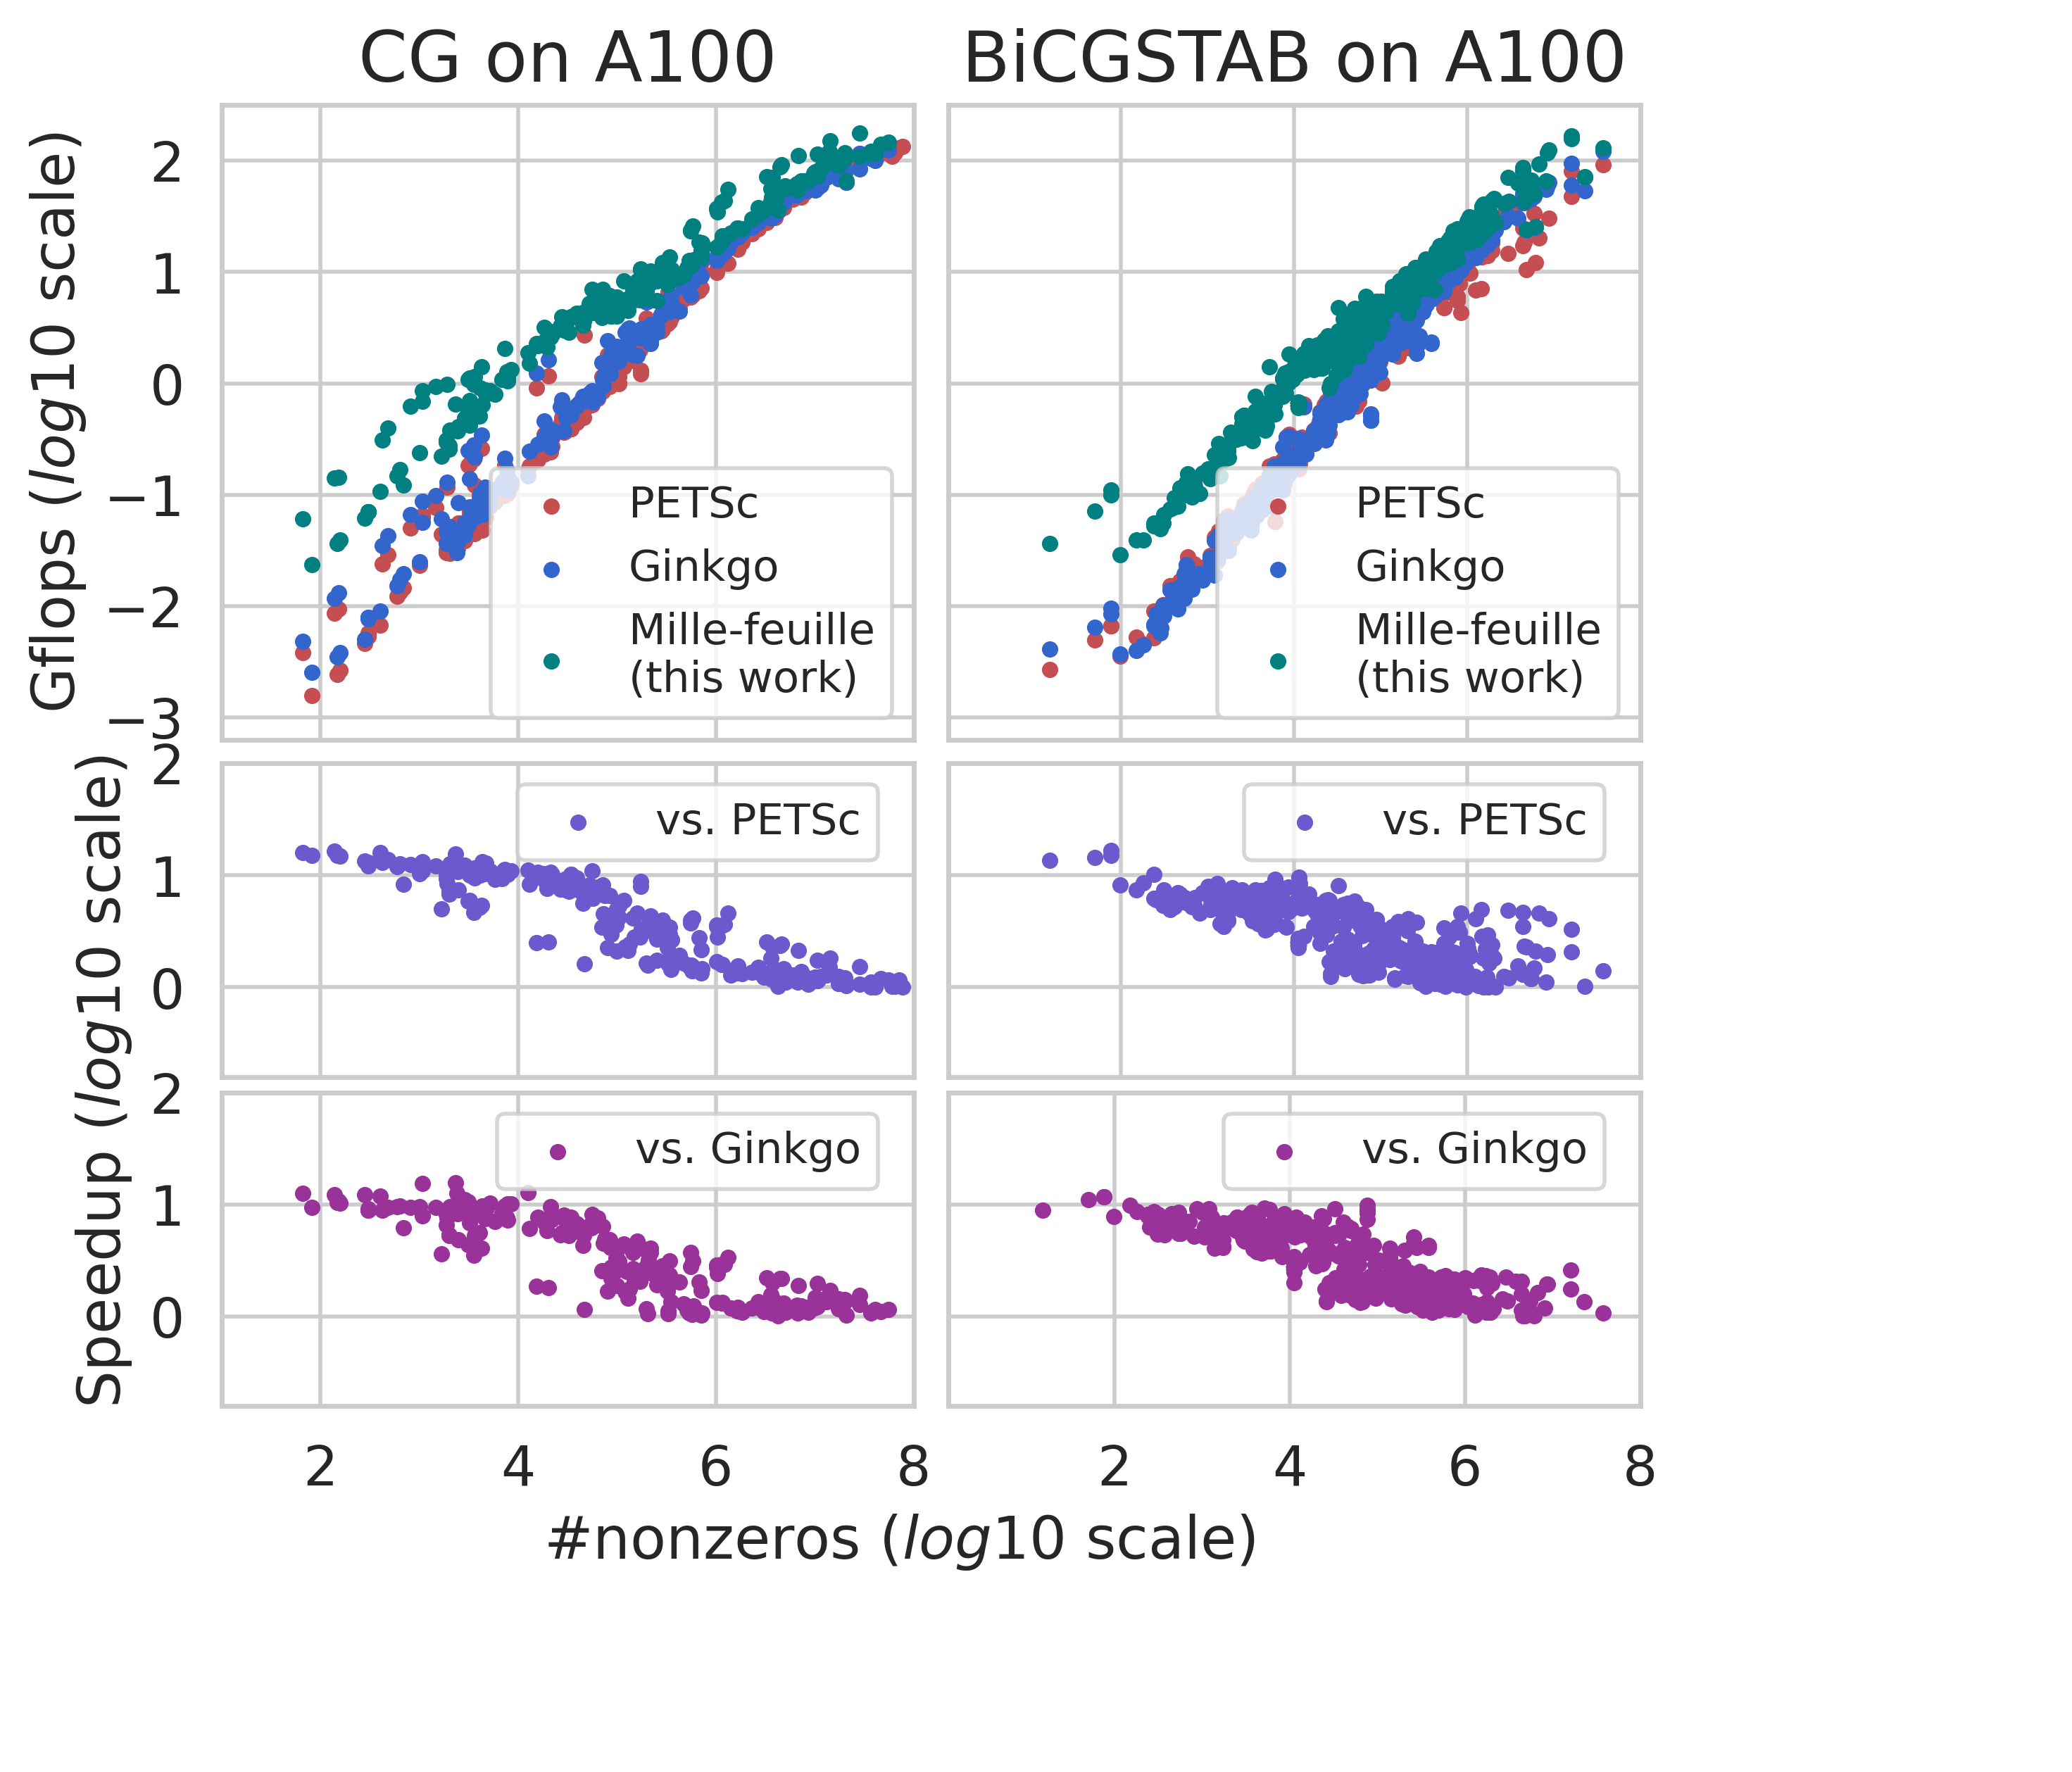

In [5]:
plt.figure(figsize=(6.5, 6), dpi=400)
legend_size=11
label_size=15
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplot(2,2,1)
plt.title("CG on A100",fontsize=18)
#size = 20
size = 10
plt.scatter((np.log10(df_cg_pg["nnzR"])), (np.log10(df_cg_pg["Gflops_petsc"])), label="PETSc", s=size, c='r')
plt.scatter((np.log10(df_cg_pg["nnzR_x"])), (np.log10(df_cg_pg["Glops_ginkgo"])), label="Ginkgo", s=size, c='#3366CC')
plt.scatter((np.log10(df_cg_pg["nnzR_x"])), (np.log10(df_cg_pg["Glops_syncfree"])), label="Mille-feuille\n(this work)", s=size, c='teal')
plt.legend(loc='lower right',fontsize=legend_size)
plt.ylim(-3.2, 2.5)
plt.xlim(1, 8)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.ylabel("Gflops ($log10$ scale)",fontsize=label_size)
plt.subplot(2,2,2)
plt.title("BiCGSTAB on A100",fontsize=18)
plt.scatter((np.log10(df_bicg_pg["nnzR"])), (np.log10(df_bicg_pg["Gflops_petsc"])), label="PETSc", s=size, c='r')
plt.scatter((np.log10(df_bicg_pg["nnzR_x"])), (np.log10(df_bicg_pg["Glops_ginkgo"])), label="Ginkgo", s=size, c='#3366CC')
plt.scatter((np.log10(df_bicg_pg["nnzR_x"])), (np.log10(df_bicg_pg["Glops_syncfree"])), label="Mille-feuille\n(this work)", s=size, c='teal')
plt.legend(loc='lower right',fontsize=legend_size)
# plt.legend(loc='lower right',fontsize=legend_size,bbox_to_anchor=(0., 1.02, 1., .102))
plt.ylim(-3.2, 2.5)
plt.xlim(0, 8)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.subplot(4,2,5)
plt.scatter((np.log10(df_cg_pg["nnzR"])), np.log10(df_cg_pg["speed_up_petsc"]), label="vs. PETSc", s=size, c="SlateBlue")
print(np.average(df_cg_pg["speed_up_petsc"]))
ssize=15
# plt.legend(loc='upper right',fontsize=legend_size)
plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0., 0.9, 0.98, .102))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(-0.8, 2)
plt.xlim(1, 8)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# plt.subplot(4,2,6)
# plt.scatter((np.log10(df_cg_pg["nnzR"])), np.log10(df_cg_pg["speed_up_petsc"]), label="Petsc", s=size, c="SlateBlue")
plt.subplot(4,2,7)
plt.scatter((np.log10(df_cg_pg["nnzR_x"])), np.log10(df_cg_pg["speed_up_ginkgo"]), label="vs. Ginkgo", s=size, c="#993399")
print(np.average(df_cg_pg["speed_up_ginkgo"]))
plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0., 0.9, 0.98, .102))
plt.ylim(-0.8, 2)
plt.xlim(1, 8)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlabel("#nonzeros ($log10$ scale)",fontsize=15)
# plt.legend(loc='upper right',fontsize=legend_size)
#plt.ylabel("               Speed up\n               ($log10$ scale)",fontsize=label_size)
#plt.ylabel("Speed up ($log10$ scale)",fontsize=label_size)
plt.ylabel("                  Speedup ($log10$ scale)",fontsize=label_size)
plt.subplot(4,2,6)
plt.scatter((np.log10(df_bicg_pg["nnzR"])), np.log10(df_bicg_pg["speed_up_petsc"]), label="vs. PETSc", s=size, c="SlateBlue")
print(np.average(df_bicg_pg["speed_up_petsc"]))
print(np.max(df_bicg_pg["speed_up_petsc"]))
plt.xlim(0, 8)
# plt.legend(loc='upper right',fontsize=legend_size)
plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0., 0.9, 0.98, .102))
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.ylim(-0.8, 2)
plt.subplot(4,2,8)
plt.scatter((np.log10(df_bicg_pg["nnzR_x"])), np.log10(df_bicg_pg["speed_up_ginkgo"]), label="vs. Ginkgo", s=size, c="#993399")
print(np.average(df_bicg_pg["speed_up_ginkgo"]))
print(np.max(df_bicg_pg["speed_up_ginkgo"]))
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.ylim(-0.8, 2)
plt.xlim(0.1, 8)
#plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0.5,0.,0.5,0.5))
# plt.legend(loc='upper right',fontsize=legend_size)
plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0., 0.9, 0.98, .102))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("#nonzeros ($log10$ scale)                                           ",fontsize=15)
plt.savefig("Figure 9.pdf", dpi= 400, format = "pdf", bbox_inches='tight', pad_inches=0.0)